In [105]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer
import warnings

try:
    import surprise
except ModuleNotFoundError:
    !pip install scikit-surprise
    import surprise
try:
    import scipy as sp
except ModuleNotFoundError:
    !pip install scipy
    import scipy as sp

from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
header = {
    'User-Agent': 'Chrome 108.0.5359.125',
    'Accept-Language': 'es'
}

In [ ]:
'''
columnaSinopsis=[]
#for idPeli in df_links['tmdbId'].head(10):
for idPeli in df_links['tmdbId']:
    print(int(idPeli))
    try:
        url = "https://www.themoviedb.org/movie/"+str(int(idPeli))
        page = requests.get(url,headers=header)
        soup = BeautifulSoup (page.content, 'html.parser')
        sinopsis = soup.find(class_="overview")
        sinopsis = str(sinopsis.text)
        #sinopsis = str(sinopsis)
        #print(sinopsis)
        columnaSinopsis.append(sinopsis)
    except:
        columnaSinopsis.append("Sin Informacion")
columnaSinopsis
'''

In [3]:
df_links = pd.read_csv('csv/links.csv')
df_links = df_links.dropna()
df_movies = pd.read_csv('csv/movies.csv')
df_movies = df_movies.dropna()
df_ratings = pd.read_csv('csv/ratings.csv')
df_ratings = df_ratings.dropna()
df_tags = pd.read_csv('csv/tags.csv')
df_tags = df_tags.dropna()

# Motor de recomendacion en base a la valoracion de los demas usuarios

<AxesSubplot:xlabel='rating', ylabel='count'>

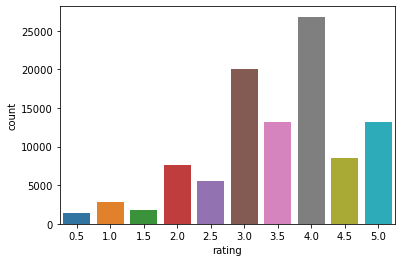

In [4]:
sns.countplot(x='rating', data=df_ratings)

In [5]:
#fusionamos en un df el de rating y el de muvies y seleccionamos solo las columnas que queremos con [[]]
df_movies_ratings = df_ratings.merge(df_movies)[['userId','movieId','title', 'rating','genres']]
df_movies_ratings

,userId,movieId,title,rating,genres
0,1,1,Toy Story (1995),4.0,Adventure|Animation|Children|Comedy|Fantasy
1,5,1,Toy Story (1995),4.0,Adventure|Animation|Children|Comedy|Fantasy
2,7,1,Toy Story (1995),4.5,Adventure|Animation|Children|Comedy|Fantasy
3,15,1,Toy Story (1995),2.5,Adventure|Animation|Children|Comedy|Fantasy
4,17,1,Toy Story (1995),4.5,Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...
100831,610,160341,Bloodmoon (1997),2.5,Action|Thriller
100832,610,160527,Sympathy for the Underdog (1971),4.5,Action|Crime|Drama
100833,610,160836,Hazard (2005),3.0,Action|Drama|Thriller
100834,610,163937,Blair Witch (2016),3.5,Horror|Thriller


In [6]:
df_movies_ratings[df_movies_ratings['title'].str.contains('Star Wa')]

,userId,movieId,title,rating,genres
1568,1,260,Star Wars: Episode IV - A New Hope (1977),5.0,Action|Adventure|Sci-Fi
1569,4,260,Star Wars: Episode IV - A New Hope (1977),5.0,Action|Adventure|Sci-Fi
1570,7,260,Star Wars: Episode IV - A New Hope (1977),5.0,Action|Adventure|Sci-Fi
1571,15,260,Star Wars: Episode IV - A New Hope (1977),5.0,Action|Adventure|Sci-Fi
1572,16,260,Star Wars: Episode IV - A New Hope (1977),3.0,Action|Adventure|Sci-Fi
...,...,...,...,...,...
81537,414,187595,Solo: A Star Wars Story (2018),3.5,Action|Adventure|Children|Sci-Fi
81538,514,187595,Solo: A Star Wars Story (2018),3.0,Action|Adventure|Children|Sci-Fi
81539,586,187595,Solo: A Star Wars Story (2018),5.0,Action|Adventure|Children|Sci-Fi
99655,514,135216,The Star Wars Holiday Special (1978),0.5,Adventure|Children|Comedy|Sci-Fi


In [7]:
ratings_table = df_movies_ratings.pivot_table(index='userId', columns='title', values='rating')
#para cambiar los NAN por 0:
ratings_table.fillna(0, inplace=True)
ratings_table


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.5,3.5,0.0,0.0,0.0


In [8]:
sparse_rating = sp.sparse.csr_matrix(ratings_table)
sparse_rating

<610x9719 sparse matrix of type '<class 'numpy.float64'>'
	with 100832 stored elements in Compressed Sparse Row format>

In [9]:
similitud_usuarios = cosine_similarity(sparse_rating)
similitud_usuarios

array([[1.        , 0.02728287, 0.05972026, ..., 0.29109737, 0.09357193,
        0.14532081],
       [0.02728287, 1.        , 0.        , ..., 0.04621095, 0.0275654 ,
        0.10242675],
       [0.05972026, 0.        , 1.        , ..., 0.02112846, 0.        ,
        0.03211875],
       ...,
       [0.29109737, 0.04621095, 0.02112846, ..., 1.        , 0.12199271,
        0.32205486],
       [0.09357193, 0.0275654 , 0.        , ..., 0.12199271, 1.        ,
        0.05322546],
       [0.14532081, 0.10242675, 0.03211875, ..., 0.32205486, 0.05322546,
        1.        ]])

In [10]:
#se hace con la transpuesta de la matriz creada anteriormente
similitud_movies = cosine_similarity(sparse_rating.T)
similitud_movies 

array([[1.        , 0.        , 0.        , ..., 0.32732684, 0.        ,
        0.        ],
       [0.        , 1.        , 0.70710678, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.70710678, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.32732684, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [11]:
df_similitud_usuarios = pd.DataFrame(similitud_usuarios, index=ratings_table.index, columns=ratings_table.index)
df_similitud_usuarios

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.027283,0.059720,0.194395,0.129080,0.128152,0.158744,0.136968,0.064263,0.016875,...,0.080554,0.164455,0.221486,0.070669,0.153625,0.164191,0.269389,0.291097,0.093572,0.145321
2,0.027283,1.000000,0.000000,0.003726,0.016614,0.025333,0.027585,0.027257,0.000000,0.067445,...,0.202671,0.016866,0.011997,0.000000,0.000000,0.028429,0.012948,0.046211,0.027565,0.102427
3,0.059720,0.000000,1.000000,0.002251,0.005020,0.003936,0.000000,0.004941,0.000000,0.000000,...,0.005048,0.004892,0.024992,0.000000,0.010694,0.012993,0.019247,0.021128,0.000000,0.032119
4,0.194395,0.003726,0.002251,1.000000,0.128659,0.088491,0.115120,0.062969,0.011361,0.031163,...,0.085938,0.128273,0.307973,0.052985,0.084584,0.200395,0.131746,0.149858,0.032198,0.107683
5,0.129080,0.016614,0.005020,0.128659,1.000000,0.300349,0.108342,0.429075,0.000000,0.030611,...,0.068048,0.418747,0.110148,0.258773,0.148758,0.106435,0.152866,0.135535,0.261232,0.060792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.164191,0.028429,0.012993,0.200395,0.106435,0.102123,0.200035,0.099388,0.075898,0.088963,...,0.178084,0.116534,0.300669,0.066032,0.148141,1.000000,0.153063,0.262558,0.069622,0.201104
607,0.269389,0.012948,0.019247,0.131746,0.152866,0.162182,0.186114,0.185142,0.011844,0.010451,...,0.092525,0.199910,0.203540,0.137834,0.118780,0.153063,1.000000,0.283081,0.149190,0.139114
608,0.291097,0.046211,0.021128,0.149858,0.135535,0.178809,0.323541,0.187233,0.100435,0.077424,...,0.158355,0.197514,0.232771,0.155306,0.178142,0.262558,0.283081,1.000000,0.121993,0.322055


In [12]:
df_similitud_movies = pd.DataFrame(similitud_movies, index=ratings_table.columns, columns=ratings_table.columns)
df_similitud_movies

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.141653,0.000000,...,0.000000,0.342055,0.543305,0.707107,0.0,0.000000,0.139431,0.327327,0.000000,0.0
'Hellboy': The Seeds of Creation (2004),0.000000,1.000000,0.707107,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
'Round Midnight (1986),0.000000,0.707107,1.000000,0.000000,0.000000,0.0,0.176777,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
'Salem's Lot (2004),0.000000,0.000000,0.000000,1.000000,0.857493,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
'Til There Was You (1997),0.000000,0.000000,0.000000,0.857493,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eXistenZ (1999),0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.211467,0.216295,0.097935,0.132489,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.192259,0.000000,0.170341,0.0
xXx (2002),0.139431,0.000000,0.000000,0.000000,0.000000,0.0,0.089634,0.000000,0.276512,0.019862,...,0.069716,0.305535,0.173151,0.246482,0.0,0.192259,1.000000,0.270034,0.100396,0.0
xXx: State of the Union (2005),0.327327,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.156764,0.000000,...,0.000000,0.382543,0.177838,0.231455,0.0,0.000000,0.270034,1.000000,0.000000,0.0


In [13]:
df_similitud_movies["[REC] (2007)"].sort_values(ascending=False)

title
[REC] (2007)                                                                  1.000000
Tremors 3: Back to Perfection (2001)                                          0.623737
Dog Soldiers (2002)                                                           0.621035
Wolf Creek (2005)                                                             0.601937
Joy Ride (2001)                                                               0.589097
                                                                                ...   
History of Future Folk, The (2012)                                            0.000000
History Boys, The (2006)                                                      0.000000
His Secret Life (a.k.a. Ignorant Fairies, The) (Fate ignoranti, Le) (2001)    0.000000
His Girl Friday (1940)                                                        0.000000
À nous la liberté (Freedom for Us) (1931)                                     0.000000
Name: [REC] (2007), Length: 9719, dty

In [14]:
def peliculasSimilares(title, n_similares):
    #le sumamos uno porque la primera siempre es la propia pelicula y nos la saltamos
    n_similares+=1
    contador = 1
    print('Peliculas similares a ' + title + ':')
    print()
    for movie in df_similitud_movies[title].sort_values(ascending=False).index[1:n_similares]:
        print(str(contador) + ' - ' + str(movie))
        contador+=1

In [15]:
peliculasSimilares("Who's Harry Crumb? (1989)", 10)


Peliculas similares a Who's Harry Crumb? (1989):

1 - Air Up There, The (1994)
2 - Funny Farm (1988)
3 - Mr. Wonderful (1993)
4 - Blind Date (1987)
5 - Armed and Dangerous (1986)
6 - Krippendorf's Tribe (1998)
7 - Amos & Andrew (1993)
8 - Cowboy Way, The (1994)
9 - Toxic Avenger, Part II, The (1989)
10 - Toxic Avenger Part III: The Last Temptation of Toxie, The (1989)


# Motor de recomendacion en base al genero

In [18]:
genres = list(set([genre for genres in df_movies["genres"].str.split("|") for genre in genres]))
genres

['Mystery',
 'Horror',
 'Comedy',
 'Musical',
 'Documentary',
 'Thriller',
 'Film-Noir',
 'Crime',
 'Adventure',
 'Children',
 'IMAX',
 'Western',
 'Romance',
 'Sci-Fi',
 'Animation',
 'Drama',
 'War',
 'Fantasy',
 'Action',
 '(no genres listed)']

In [19]:
df_movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [20]:
genre_matrix = []
for index, row in df_movies.iterrows():
    genre_list = row["genres"].split("|")
    genre_vector = [1 if genre in genre_list else 0 for genre in genres]
    genre_matrix.append(genre_vector)

In [21]:
genre_matrix = pd.DataFrame(genre_matrix, columns=genres)
genre_matrix

,Mystery,Horror,Comedy,Musical,Documentary,Thriller,Film-Noir,Crime,Adventure,Children,IMAX,Western,Romance,Sci-Fi,Animation,Drama,War,Fantasy,Action,(no genres listed)
0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
9738,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
9739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9740,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [22]:
def peliculasSimilaresPorGenero(title, n_similares):
    contador = 1
    selected_movie = df_movies[df_movies["title"] == title]
    selected_movie_index = selected_movie.index[0]
    #sacamos las similitudes de los generos
    similarities = cosine_similarity(genre_matrix[selected_movie_index:selected_movie_index+1], genre_matrix).flatten()
    #las metemos en una tupla y las ordenamos de mayor a menor 
    movie_list = [(index, similarity) for index, similarity in enumerate(similarities)]
    movie_list.sort(key=lambda x: x[1], reverse=True)
    
    print('Peliculas similares a ' + title + ':')
    print()
    #la bandera nos sirve para saltarnos la propia peli que buscamos
    #siempre esta a false y si nos encontramos la peli que estamos buscando la activamos a True
    #si esta en True al finalizar el bucle significa que ha saltado el titulo que buscabamos para no repetirse a si mismo 
    #y por lo tanto hay que añadir uno mas para llegar al numero deseado por el usuario
    bandera=False
    for movie in movie_list[0:n_similares]:
        if(title != df_movies.iloc[movie[0]]["title"]):
            print(str(contador)+' - ' +df_movies.iloc[movie[0]]["title"])
            contador+=1
        else:
            bandera=True
    if(bandera):
        #print('bandera')
        mov=movie_list[n_similares][0]
        print(str(contador)+' - ' +df_movies.iloc[mov]["title"])

In [23]:
#peliculasSimilaresPorGenero(df_movies[df_movies['title'].str.contains('Star Wa')][0:1]['title'], 10)

In [24]:
df_movies[df_movies['title'].str.contains('Episode')]

,movieId,title,genres
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
898,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi
911,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi
1979,2628,Star Wars: Episode I - The Phantom Menace (1999),Action|Adventure|Sci-Fi
3832,5378,Star Wars: Episode II - Attack of the Clones (...,Action|Adventure|Sci-Fi|IMAX
5896,33493,Star Wars: Episode III - Revenge of the Sith (...,Action|Adventure|Sci-Fi
7868,94122,Comic-Con Episode IV: A Fan's Hope (2011),Documentary
8683,122886,Star Wars: Episode VII - The Force Awakens (2015),Action|Adventure|Fantasy|Sci-Fi|IMAX


In [1]:
def predict_rating_for_movie(movie_name, userID):
    # obtener géneros de la película a predecir
    movie_genres = list(set([genre for genres in prueba.df_movies["genres"].str.split("|") for genre in genres]))
    # calcular la media de valoraciones del usuario para cada género en común con la película a predecir
    rating_sums = {genre: 0 for genre in movie_genres}
    rating_counts = {genre: 0 for genre in movie_genres}
    df_userID=prueba.df_movies_ratings[prueba.df_movies_ratings['userId']==userID]
    for a, row in df_userID.iterrows():
        #print(row["genres"])
        for genre in set(row["genres"].split('|')).intersection(movie_genres):
            rating_sums[genre] += row["rating"]
            rating_counts[genre] += 1
    #print(rating_counts["Fantasy"])
#     for r in rating_counts.items():
#         if(r[1]==0):
#             r[1]==1
        #print(r)
    # calcular predicción para la película a predecir
    
    genres_to_consider = [genre for genre in movie_genres if rating_counts[genre] > 0]
    prediction = sum(rating_sums[genre]/rating_counts[genre] for genre in genres_to_consider) / len(genres_to_consider)
#     prediction = 0
#     for genre in movie_genres:
#         if(rating_counts[genre]!=0):
#             prediction += rating_sums[genre]/rating_counts[genre]
#     prediction = prediction / len(movie_genres)
    return prediction

# Ejemplo de uso
movie_name = "Seven (a.k.a. Se7en) (1995)"
print(f'Prediction for movie {movie_name}: {predict_rating_for_movie(movie_name, 1)}')

NameError: name 'prueba' is not defined

para seleccionar el id correspondiente entre el original y el de la pagina de peliculas:

In [ ]:
selected_movie = prueba.df_movies[prueba.df_movies["title"] == movie_title]["movieId"]
print(selected_movie.values[0])
selected_movie_index = selected_movie.values[0]
print("movie index original "+str(selected_movie_index))
#Tenemos el id del sitio para buscar las peliculas osea q hay q transformar el id de la pelicula en este mediante el df de links en el que estan interrelacionados para poder visualizar los datos
selected_movie = prueba.df_links[prueba.df_links['movieId']==selected_movie_index]['tmdbId']
selected_movie_index = selected_movie.values[0]
print("movie de la pagina "+str(selected_movie_index))

In [2]:
class Procesos:
    def __init__(self):
        self.cargaDocumentos()
    def cargaDocumentos(self):
        self.df_links = pd.read_csv('csv/links.csv')
        self.df_links = self.df_links.dropna()
        self.df_movies = pd.read_csv('csv/movies.csv')
        self.df_movies = self.df_movies.dropna()
        self.df_ratings = pd.read_csv('csv/ratings.csv')
        self.df_ratings = self.df_ratings.dropna()
        self.df_tags = pd.read_csv('csv/tags.csv')
        self.df_tags = self.df_tags.dropna()
        self.df_movies_ratings = self.df_ratings.merge(self.df_movies)[['userId','movieId','title', 'rating','genres']]
        
        self.df_movies_ratings_tags = pd.merge(self.df_movies_ratings, self.df_tags, how='outer')[['userId','movieId','title', 'rating','genres', 'tag']]
        self.df_movies_ratings_tags["tag"] = self.df_movies_ratings_tags["tag"].str.lower()
        #self.df_movies_ratings_tags.fillna("vacio", inplace = True)
        
        self.ratings_table = self.df_movies_ratings.pivot_table(index='userId', columns='title', values='rating')
        #para cambiar los NAN por 0:
        self.ratings_table.fillna(0, inplace=True)
    def recomedacionPorValoracionOtrosUsuarios(self, nombrePelicula, n_similares):
        sparse_rating = sp.sparse.csr_matrix(self.ratings_table)
        similitud_usuarios = cosine_similarity(sparse_rating)
        #se hace con la transpuesta de la matriz creada anteriormente
        similitud_movies = cosine_similarity(sparse_rating.T)
        df_similitud_usuarios = pd.DataFrame(similitud_usuarios, index=self.ratings_table.index, columns=self.ratings_table.index)
        df_similitud_movies = pd.DataFrame(similitud_movies, index=self.ratings_table.columns, columns=self.ratings_table.columns)
        #le sumamos uno a n_similares porque la primera siempre es la propia pelicula y nos la saltamos
        n_similares+=1
        contador = 1
        print('Peliculas similares a ' + nombrePelicula + ':')
        print()
        for movie in df_similitud_movies[nombrePelicula].sort_values(ascending=False).index[1:n_similares]:
            print(str(contador) + ' - ' + str(movie))
            contador+=1
    def recomedacionPorGenero(self, nombrePelicula, n_similares):
        genres = list(set([genre for genres in self.df_movies["genres"].str.split("|") for genre in genres]))
        genre_matrix = []
        for index, row in self.df_movies.iterrows():
            genre_list = row["genres"].split("|")
            genre_vector = [1 if genre in genre_list else 0 for genre in genres]
            genre_matrix.append(genre_vector)
        genre_matrix = pd.DataFrame(genre_matrix, columns=genres)
        contador = 1
        selected_movie = self.df_movies[self.df_movies["title"] == nombrePelicula]
        selected_movie_index = selected_movie.index[0]
        #sacamos las similitudes de los generos
        similarities = cosine_similarity(genre_matrix[selected_movie_index:selected_movie_index+1], genre_matrix).flatten()
        #las metemos en una tupla y las ordenamos de mayor a menor 
        movie_list = [(index, similarity) for index, similarity in enumerate(similarities)]
        movie_list.sort(key=lambda x: x[1], reverse=True)

        print('Peliculas similares a ' + nombrePelicula + ':')
        print()
        #la bandera nos sirve para saltarnos la propia peli que buscamos
        #siempre esta a false y si nos encontramos la peli que estamos buscando la activamos a True
        #si esta en True al finalizar el bucle significa que ha saltado el titulo que buscabamos para no repetirse a si mismo 
        #y por lo tanto hay que añadir uno mas para llegar al numero deseado por el usuario
        bandera=False
        for movie in movie_list[0:n_similares]:
            if(nombrePelicula != self.df_movies.iloc[movie[0]]["title"]):
                print(str(contador)+' - ' +self.df_movies.iloc[movie[0]]["title"])
                contador+=1
            else:
                bandera=True
        if(bandera):
            #print('bandera')
            mov=movie_list[n_similares][0]
            print(str(contador)+' - ' +self.df_movies.iloc[mov]["title"])
    def predecirRatingDeUserAPeliculaPorSusGeneros(self, nombrePelicula, user_id):
        yaVotado = self.df_movies_ratings[(self.df_movies_ratings['title']==nombrePelicula) & (self.df_movies_ratings['userId']==user_id)]["rating"].unique()
        if(len(yaVotado)!=0):
            prediction = yaVotado[0]
            print()
            print("La prediccion para " + nombrePelicula+" es: " + str(prediction))
            #return prediction
        else:
            # obtener géneros de la película a predecir
            movie_genres = self.df_movies_ratings[self.df_movies_ratings['title']==nombrePelicula]["genres"].unique()
            generosPeli = movie_genres[0].split("|")
            # filtrar valoraciones del usuario para peliculas con generos en comun
            user_ratings_ID = self.df_movies_ratings[self.df_movies_ratings['userId'] == user_id]
            user_ratings = user_ratings_ID.loc[user_ratings_ID['genres'].str.split('|').apply(lambda x: any(i in x for i in generosPeli))]
            # calcular la media de valoraciones del usuario para las peliculas con generos en comun
            if user_ratings.empty:
                print("La lista es empty")
                #return None
            else:
                #prediction = user_ratings_ID['rating'].mean()
                prediction = format(user_ratings['rating'].mean(), '.3f')
                print()
                print("La prediccion para " + nombrePelicula + " es: " + str(prediction))
                #return prediction
    def recomedacionPorTags(self, nombrePelicula, n_similares):
        count_matrix = self.df_movies_ratings_tags.pivot_table(index='movieId', columns='tag', values='userId')
        #count_matrix = self.df_movies_ratings_tags.pivot_table(index='movieId', columns='tag', values='rating')
        count_matrix.fillna(0, inplace=True)
        sparse_rating = sp.sparse.csr_matrix(count_matrix)
        #print(sparse_rating)    
        selected_movie = self.df_movies[self.df_movies["title"] == nombrePelicula]["movieId"].values[0]
        #print(selected_movie)

        #encontramos el id de la pelicula en la matriz
        selected_movie_index = count_matrix.index.get_loc(selected_movie)

        similarities = cosine_similarity(sparse_rating, sparse_rating[selected_movie_index])

        movie_list = [(index, similarity) for index, similarity in enumerate(similarities)]
        movie_list.sort(key=lambda x: x[1], reverse=True)
        
        print('Peliculas similares a ' + nombrePelicula + ':')
        print()
        bandera=False
        contador = 1
        for movie in movie_list[0:n_similares]:
            if(nombrePelicula != self.df_movies.iloc[movie[0]]["title"]):
                print(str(contador)+' - ' +self.df_movies.iloc[movie[0]]["title"])
                contador+=1
            else:
                bandera=True
        if(bandera):
            mov=movie_list[n_similares][0]
            print(str(contador)+' - ' +self.df_movies.iloc[mov]["title"])
    def predecirRatingDeUserAPeliculaPorSusTags(self, nombrePelicula, user_id):
        yaVotado = self.df_movies_ratings[(self.df_movies_ratings['title']==nombrePelicula) & (self.df_movies_ratings['userId']==user_id)]["rating"].unique()
        if(len(yaVotado)!=0):
            prediction = yaVotado[0]
            print()
            print("La prediccion para " + nombrePelicula+" es: " + str(prediction))
            #return prediction
        else:
            # obtener tags de la película a predecir
            tagsPeli = []
            movie_tags = self.df_movies_ratings_tags[self.df_movies_ratings_tags['title']==nombrePelicula]["tag"].unique()
            for m in movie_tags:
                tagsPeli.append(m)
            #print(tagsPeli)
            filtroMergeandoTags = self.df_movies_ratings_tags[['userId','movieId','title', 'rating', 'tag']]
            filtroEnBaseUserId = filtroMergeandoTags[filtroMergeandoTags['userId']==1]
            user_ratings = filtroEnBaseUserId[filtroEnBaseUserId['tag'].isin(tagsPeli)]
            #si el usuario a creado un tag de alguna peli que sea igual a alguno de el de la pelicula buscada filtramos mas el df quitando los nulos
            #si no a hecho ningun tag y todos sus tag son nan dejamos el df como esta ya que si hacemos dropna eliminamos el df entero
            if user_ratings.dropna().size != 0:
                user_ratings = user_ratings.dropna()
            user_ratings
            # calcular la media de valoraciones del usuario para las peliculas con generos en comun
            if user_ratings.empty:
                print("La lista es empty")
                #return None
            else:
                #prediction = user_ratings_ID['rating'].mean()
                prediction = format(user_ratings['rating'].mean(), '.3f')
                print()
                print("La prediccion para " + nombrePelicula + " es: " + str(prediction))
                #return prediction

            

p = Procesos()

#Extra
p.recomedacionPorValoracionOtrosUsuarios("Star Wars: Episode IV - A New Hope (1977)", 10)

#Recomendaciones en base a caracteristicas sueltas
p.recomedacionPorGenero("Star Wars: Episode IV - A New Hope (1977)", 10)
p.recomedacionPorTags("Star Wars: Episode IV - A New Hope (1977)", 10)

#Prediccion de rating mediante un usuario dado
p.predecirRatingDeUserAPeliculaPorSusGeneros("Star Wars: Episode IV - A New Hope (1977)", 1)
p.predecirRatingDeUserAPeliculaPorSusTags("City of God (Cidade de Deus) (2002)", 1)

#Recomendacion en base a un usuario y caracteristicas


Peliculas similares a Star Wars: Episode IV - A New Hope (1977):

1 - Star Wars: Episode V - The Empire Strikes Back (1980)
2 - Star Wars: Episode VI - Return of the Jedi (1983)
3 - Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)
4 - Matrix, The (1999)
5 - Indiana Jones and the Last Crusade (1989)
6 - Back to the Future (1985)
7 - Star Wars: Episode I - The Phantom Menace (1999)
8 - Terminator, The (1984)
9 - Godfather, The (1972)
10 - Saving Private Ryan (1998)
Peliculas similares a Star Wars: Episode IV - A New Hope (1977):

1 - Waterworld (1995)
2 - Stargate (1994)
3 - Demolition Man (1993)
4 - Star Wars: Episode V - The Empire Strikes Back (1980)
5 - Star Wars: Episode VI - Return of the Jedi (1983)
6 - Star Trek III: The Search for Spock (1984)
7 - Lost in Space (1998)
8 - Rocketeer, The (1991)
9 - Tron (1982)
10 - Six-String Samurai (1998)
Peliculas similares a Star Wars: Episode IV - A New Hope (1977):

1 - Misérables, Les (1995)
2 - Double Happine

In [46]:
df_movies_rating_user = p.df_movies_ratings[p.df_movies_ratings['userId']==1]
df_movies_rating_user = df_movies_rating_user.sort_values(by='rating',ascending=False)
df_movies_rating_user

,userId,movieId,title,rating,genres
16250,1,5060,M*A*S*H (a.k.a. MASH) (1970),5.0,Comedy|Drama|War
14053,1,2872,Excalibur (1981),5.0,Adventure|Fantasy
9066,1,1291,Indiana Jones and the Last Crusade (1989),5.0,Action|Adventure
9206,1,1298,Pink Floyd: The Wall (1982),5.0,Drama|Musical
14254,1,2948,From Russia with Love (1963),5.0,Action|Adventure|Thriller
...,...,...,...,...,...
12997,1,2617,"Mummy, The (1999)",2.0,Action|Adventure|Comedy|Fantasy|Horror|Thriller
11663,1,2253,Toys (1992),2.0,Comedy|Fantasy
11991,1,2338,I Still Know What You Did Last Summer (1998),2.0,Horror|Mystery|Thriller
12117,1,2389,Psycho (1998),2.0,Crime|Horror|Thriller


In [47]:
#cogemos los primeros 10 para ver que generos le gustan mas, anteriormente hemos ordenado por genero
genero_mejor_rating_unicos = list(set([genre for genres in df_movies_rating_user.head(10)["genres"].str.split("|") for genre in genres]))
# creamos un diccionario para guardar los generos y cuantas veces se repiten
genre_count = {}
for g in genero_mejor_rating_unicos:
    genre_count[g] = df_movies_rating_user.head(10)['genres'].str.count(g).sum()
#ordenamos el diccionario de mayor a menor
genero_mejor_rating = dict(sorted(genre_count.items(), key=lambda x: x[1], reverse=True))
genero_mejor_rating

{'Adventure': 5,
 'Action': 4,
 'Drama': 4,
 'Comedy': 2,
 'Animation': 2,
 'War': 2,
 'Musical': 2,
 'Thriller': 2,
 'Children': 1,
 'Fantasy': 1,
 'Romance': 1}

In [55]:
df_movies_no_rating_user = p.df_movies[p.df_movies['movieId'].isin(df_movies_rating_user['movieId']) == False]
df_movies_no_rating_user

,movieId,title,genres
1,2,Jumanji (1995),Adventure|Children|Fantasy
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [107]:
for genre, weight in genero_mejor_rating.items():
    df_movies_no_rating_user[genre] = df_movies_no_rating_user["genres"].str.contains(genre).apply(lambda x: weight if x else 0)
df_movies_no_rating_user["sumaPesos"] = df_movies_no_rating_user[genero_mejor_rating.keys()].sum(axis=1)
#quitamos las pelis que no contengan ninguno de nuestros generos
df_movies_no_rating_user = df_movies_no_rating_user.sort_values(by='sumaPesos',ascending=False)
df_movies_no_rating_user[['title','sumaPesos']]

,title,sumaPesos
3608,"Stunt Man, The (1980)",18
8597,Dragonheart 2: A New Beginning (2000),18
5476,"White Sun of the Desert, The (Beloe solntse pu...",18
7170,Aelita: The Queen of Mars (Aelita) (1924),17
7441,Rubber (2010),17
...,...,...
1097,Zeus and Roxanne (1997),1
8143,Yongary: Monster from the Deep (1967),1
4679,"Cabinet of Dr. Caligari, The (Cabinet des Dr. ...",1
301,"Baby-Sitters Club, The (1995)",1


In [93]:
vectorizer = CountVectorizer(vocabulary=genero_mejor_rating.keys())
movies_vectors = vectorizer.fit_transform(df_movies_no_rating_user[genero_mejor_rating.keys()])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1322: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


In [94]:
similarities = cosine_similarity(movies_vectors)

In [95]:
df_movies_no_rating_user["similarity"] = similarities.flatten()
df_movies_no_rating_user.sort_values("similarity", ascending=False)

ValueError: Length of values (121) does not match length of index (8781)

In [123]:
def recomendacionEnBaseGeneroPelisQueNoHaVistoUsuario(user_id, n_similares):
    warnings.filterwarnings('ignore')
    df_movies_rating_user = p.df_movies_ratings[p.df_movies_ratings['userId']==user_id]
    df_movies_rating_user = df_movies_rating_user.sort_values(by='rating',ascending=False)

    #cogemos los primeros 10 para ver que generos le gustan mas, anteriormente hemos ordenado por genero
    genero_mejor_rating_unicos = list(set([genre for genres in df_movies_rating_user.head(10)["genres"].str.split("|") for genre in genres]))

    # creamos un diccionario para guardar los generos y cuantas veces se repiten
    genre_count = {}
    for g in genero_mejor_rating_unicos:
        genre_count[g] = df_movies_rating_user.head(10)['genres'].str.count(g).sum()

    #ordenamos el diccionario de mayor a menor
    genero_mejor_rating = dict(sorted(genre_count.items(), key=lambda x: x[1], reverse=True))

    #sacamos las pelis que el usuario no ha visto
    df_movies_no_rating_user = p.df_movies[p.df_movies['movieId'].isin(df_movies_rating_user['movieId']) == False]
    #creamos en el df una columna por cada genero que le gusta al usuario y le agregamos cuanto le gusta
    for genre, weight in genero_mejor_rating.items():
        df_movies_no_rating_user[genre] = df_movies_no_rating_user["genres"].str.contains(genre).apply(lambda x: weight if x else 0)
    #creamos una nueva columna con la suma de cada fila para saber que peliculas le pueden gustar mas
    df_movies_no_rating_user["sumaPesos"] = df_movies_no_rating_user[genero_mejor_rating.keys()].sum(axis=1)
    #ordenamos por las pelis que tengan una mayor puntuacion en la columna sumaPesos ya que esto quiere decir que hay muchos generos que le gustan al usuario
    df_movies_no_rating_user = df_movies_no_rating_user.sort_values(by='sumaPesos',ascending=False)
    
    df_peliculas_mostrar = df_movies_no_rating_user['title'][0:n_similares]
    
    contador = 1
    for movie in df_peliculas_mostrar:
        print(str(contador)+' - ' +movie)
        contador+=1

recomendacionEnBaseGeneroPelisQueNoHaVistoUsuario(1, 10)

1 - White Sun of the Desert, The (Beloe solntse pustyni) (1970)
2 - Dragonheart 2: A New Beginning (2000)
3 - Stunt Man, The (1980)
4 - Blood Diamond (2006)
5 - Little Big Soldier (Da bing xiao jiang) (2010)
6 - Hunting Party, The (2007)
7 - Aelita: The Queen of Mars (Aelita) (1924)
8 - Three Kings (1999)
9 - Mulan (1998)
10 - Rubber (2010)
